In [1]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING THE DATASET

Customer = pd.read_csv('marketing-campaign.xls')
Customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
#CHECKING MISSING VALUES

missing_count = Customer.isnull().sum()
print(missing_count)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [4]:
#FILLING THE MISSING INCOME COLUMNS WITH MEAN OF INCOMES

x = Customer['Income'].mean()
Customer['Income'].fillna(x,inplace=True)

#AGAIN CHECKING MISSING VALUES

missing_count = Customer.isnull().sum()
print(missing_count)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [5]:
# ADDING NEW COLUMNS

import datetime
Customer['Age'] = 2022-Customer['Year_Birth']
Customer['Joining_date'] = pd.to_datetime(Customer['Dt_Customer'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
Customer['Total_children'] = Customer['Kidhome'] + Customer['Teenhome']
Customer['Total_spend'] = Customer['MntWines']+Customer['MntFruits']+Customer['MntMeatProducts']+Customer['MntFishProducts']+Customer['MntSweetProducts']+Customer['MntGoldProds']
Customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Joining_date,Total_children,Total_spend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,65,04-09-2012,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,68,08-03-2014,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,21-08-2013,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,38,10-02-2014,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,19-01-2014,1,422


In [6]:
#PEOPLE WHO ACCEPTED THE OFFER IN THE FIRST CAMPAIGN BASED ON MARITAL STATUS

pd.crosstab(columns= Customer['Marital_Status'] , index=Customer['AcceptedCmp1'])

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
AcceptedCmp1,,,,,,,,
0,1,3,220,801,449,548,72,2
1,1,0,12,63,31,32,5,0


In [7]:
#WHICH TYPE OF CUSTOMERS ARE THE BIGGEST BUYERS?
Data = Customer.groupby('Education').Total_spend.sum()
Data = Data.reset_index()
Data
#Graduated Customers are the biggest buyers.

,Education,Total_spend
0,2n Cycle,100795
1,Basic,4417
2,Graduation,698626
3,Master,226359
4,PhD,326791


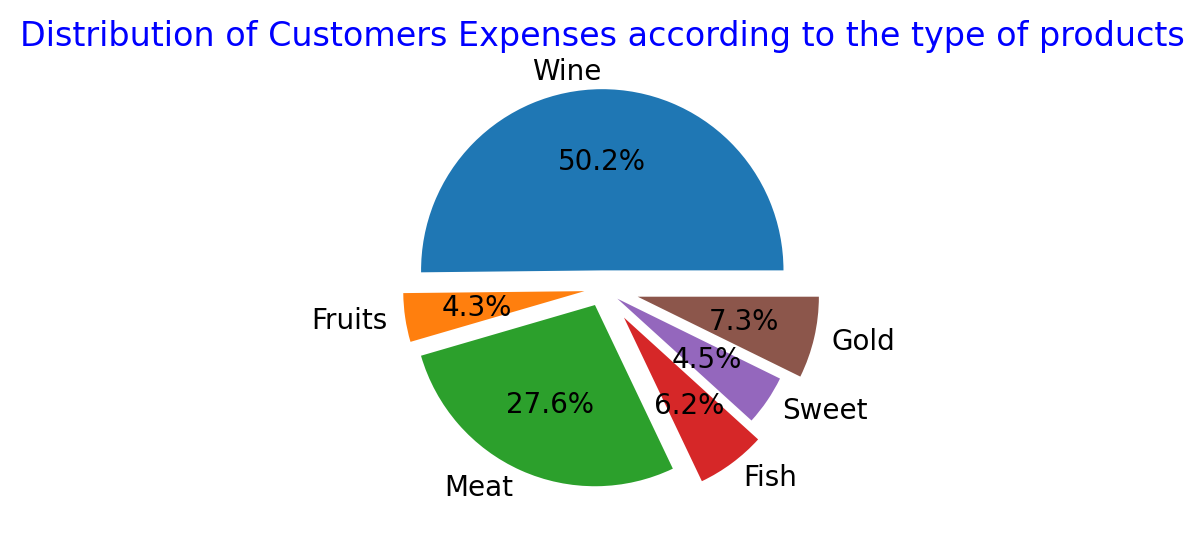

In [8]:
#PIE CHART TO SHOW WHERE ARE THE CUSTOMERS SPENDING THEIR MONEY

x1 = Customer['MntWines'].sum()
x2 = Customer['MntFruits'].sum()
x3 = Customer['MntMeatProducts'].sum()
x4 = Customer['MntFishProducts'].sum()
x5 = Customer['MntSweetProducts'].sum()
x6 = Customer['MntGoldProds'].sum()
Values = [x1,x2,x3,x4,x5,x6] 
MyLabels = ['Wine','Fruits','Meat','Fish','Sweet','Gold']
Myexplode = [0.1,0.1,0.1,0.2,0.1,0.2]
plt.figure(figsize=(4,3),dpi=200)
plt.pie(Values , labels = MyLabels ,autopct='%1.1f%%',  explode = Myexplode)
plt.title('Distribution of Customers Expenses according to the type of products',c='Blue')
plt.show()

In [9]:
#AVERAGE BASKET SIZE BASED ON EDUCATION LEVEL

#Customer.groupby('Education').Total_spend.sum()
#Customer.groupby('Education').Total_spend.max()
Data = Customer.groupby('Education').Total_spend.aggregate([sum, max, len])
Data['AverageBasket'] = Customer.groupby('Education').Total_spend.mean()
Data = Data.reset_index()
Data

,Education,sum,max,len,AverageBasket
0,2n Cycle,100795,2257,203,496.527094
1,Basic,4417,839,54,81.796296
2,Graduation,698626,2524,1127,619.898846
3,Master,226359,2525,370,611.781081
4,PhD,326791,2440,486,672.409465


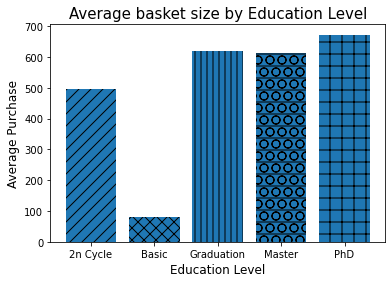

In [10]:
#Data Visualization for Average Basket Size

Bars = plt.bar(Data.Education,Data.AverageBasket)
Bars[0].set_hatch('//')
Bars[1].set_hatch("XX")
Bars[2].set_hatch("||")
Bars[3].set_hatch("O-")
Bars[4].set_hatch("+")
plt.xlabel('Education Level',size=12)
plt.ylabel('Average Purchase',size=12)
plt.title('Average basket size by Education Level', size=15)
plt.show()

In [11]:
#BIGGEST CUSTOMERS FOR WINE

Data = Customer.groupby('Education').MntWines.sum()
Data = Data.reset_index()
Data

,Education,MntWines
0,2n Cycle,40231
1,Basic,391
2,Graduation,320371
3,Master,123238
4,PhD,196585


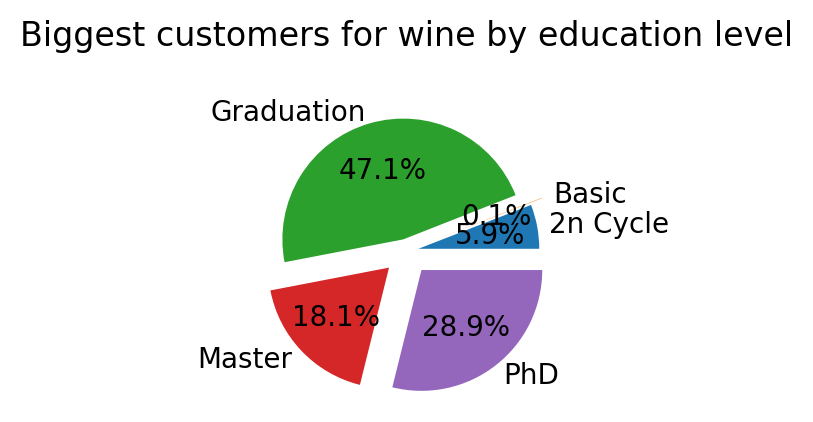

In [12]:
#DATA VISUALIZATION FOR BIGGEST CUSTOMERS OF WINE

MyLabels = ['2n Cycle', 'Basic' , 'Graduation' , 'Master' ,'PhD']
Myexplode = [0.1,0.2,0.1,0.2,0.2]
plt.figure(figsize=(4,2),dpi=200)
Data = Customer.groupby('Education').MntWines.sum()
plt.pie(Data , labels = MyLabels ,autopct='%1.1f%%', explode = Myexplode)
plt.title('Biggest customers for wine by education level\n')
plt.show()

In [13]:
#AVERAGE INCOME OF TOP 20% WINE CUSTOMERS

Sdata = Customer.loc[:,["MntWines","Income"]]
Fdata = Sdata.sort_values(by=['MntWines'], ascending=False)
x=len(Fdata)//5
Udata = Fdata.head(x)
Udata['Income'].mean()

72563.39397925799

In [14]:
#WHAT TOP 20% WINE CUSTOMERS BUY APART FROM WINES

Sdata = Customer.loc[:,["MntWines","Income","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
Fdata = Sdata.sort_values(by=['MntWines'], ascending=False)
x=len(Fdata)//5
Udata = Fdata.head(x)
Udata

,MntWines,Income,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1749,1493,80360.0,86,454,112,43,43
824,1492,87771.0,38,287,50,57,33
559,1492,87771.0,38,287,50,57,33
2098,1486,81929.0,55,278,49,0,185
917,1478,84169.0,19,403,0,19,0
...,...,...,...,...,...,...,...
641,586,76140.0,66,653,17,0,26
797,584,60161.0,44,212,46,8,177
1887,584,86979.0,100,835,65,83,35
414,583,75072.0,34,309,0,22,125


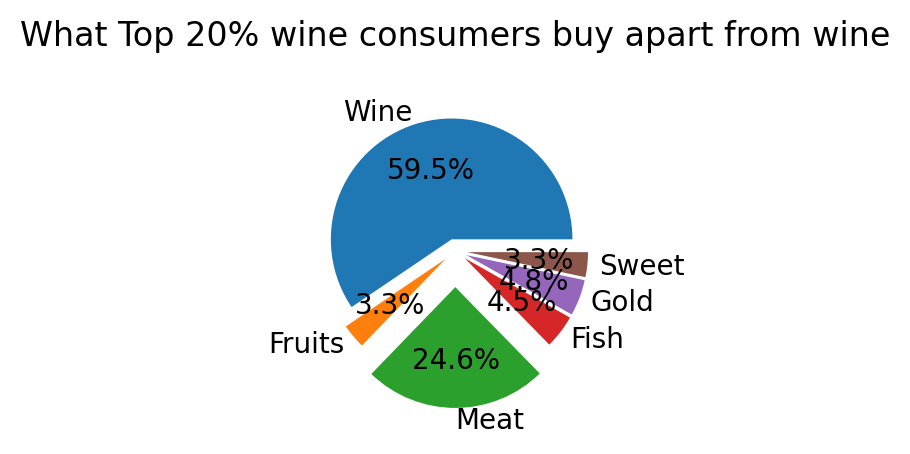

In [15]:
#WHAT TOP 20% WINE CUSTOMERS BUY APART FROM WINES

x1=Udata['MntWines'].mean()
x2=Udata['MntFruits'].mean()
x3=Udata['MntMeatProducts'].mean()
x4=Udata['MntFishProducts'].mean()
x5=Udata['MntGoldProds'].mean()
x6=Udata['MntSweetProducts'].mean()
x=[x1,x2,x3,x4,x5,x6]
MyLabels=["Wine","Fruits","Meat","Fish","Gold","Sweet"]
explode=[0.1,0.1,0.3,0.1,0.1,0.1]
plt.figure(figsize=(4,2),dpi=200)
plt.title("What Top 20% wine consumers buy apart from wine\n")
plt.pie(x,labels=MyLabels,autopct="%.1f%%",explode=explode)
plt.show()

In [18]:
#Predicting the Response(i.e. Dependent variable(y)) based on certain independent variables(x)
#EXTRACTING THE DEPENDENT AND INDEPENDENT VARIABLES

var = ['NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
X = Customer[var]
y = Customer['Response']

<AxesSubplot:>

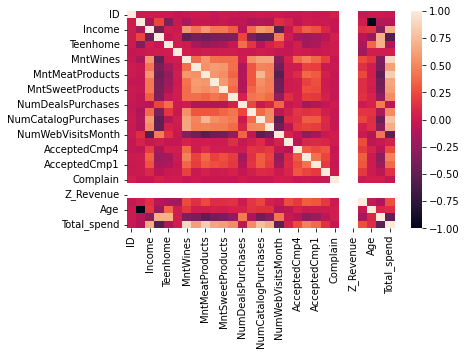

In [19]:
#VISUALISING THE DATASET USING A CORRELATION MAP

sns.heatmap(Customer.corr())

In [42]:
#SPLITTING THE DATASET INTO TESTING AND TRAINING SETS

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
#FEATURE SCALING (SCALES THE DATA TO A LEVEL) (Affecting the accuracy in this model)

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [44]:
#CREATING THE LOGISTIC REGRESSION MODEL USING TRAIN SET AND PREDICTING THE RESPONSE OF TEST SET


from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

#FIT THE MODEL WITH DATA

LogReg.fit(X_train,y_train)
y_Pred = LogReg.predict(X_test)

In [45]:
#Confusion matrix-To know the true positive and false positive rate
#Shows how accurate, specific and precise the model is

from sklearn.metrics import confusion_matrix
Cm = confusion_matrix(y_test,y_Pred)
Cm

array([[456,   6],
       [ 78,  20]], dtype=int64)

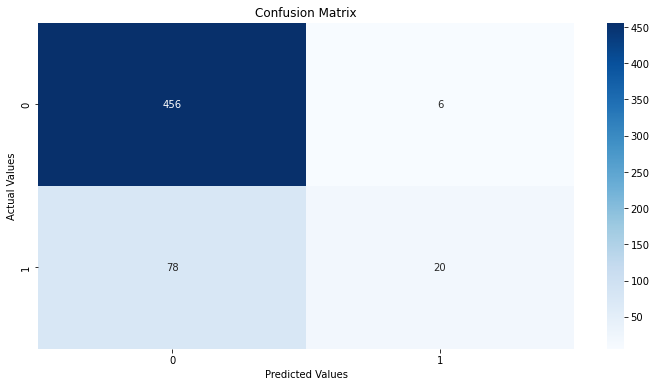

In [46]:
#CONFUSION MATRIX VISUALIZATION

import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(Cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [47]:
#CALCULATING ACCURACY

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_Pred))

Accuracy :  0.85


In [48]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       462
           1       0.77      0.20      0.32        98

    accuracy                           0.85       560
   macro avg       0.81      0.60      0.62       560
weighted avg       0.84      0.85      0.81       560



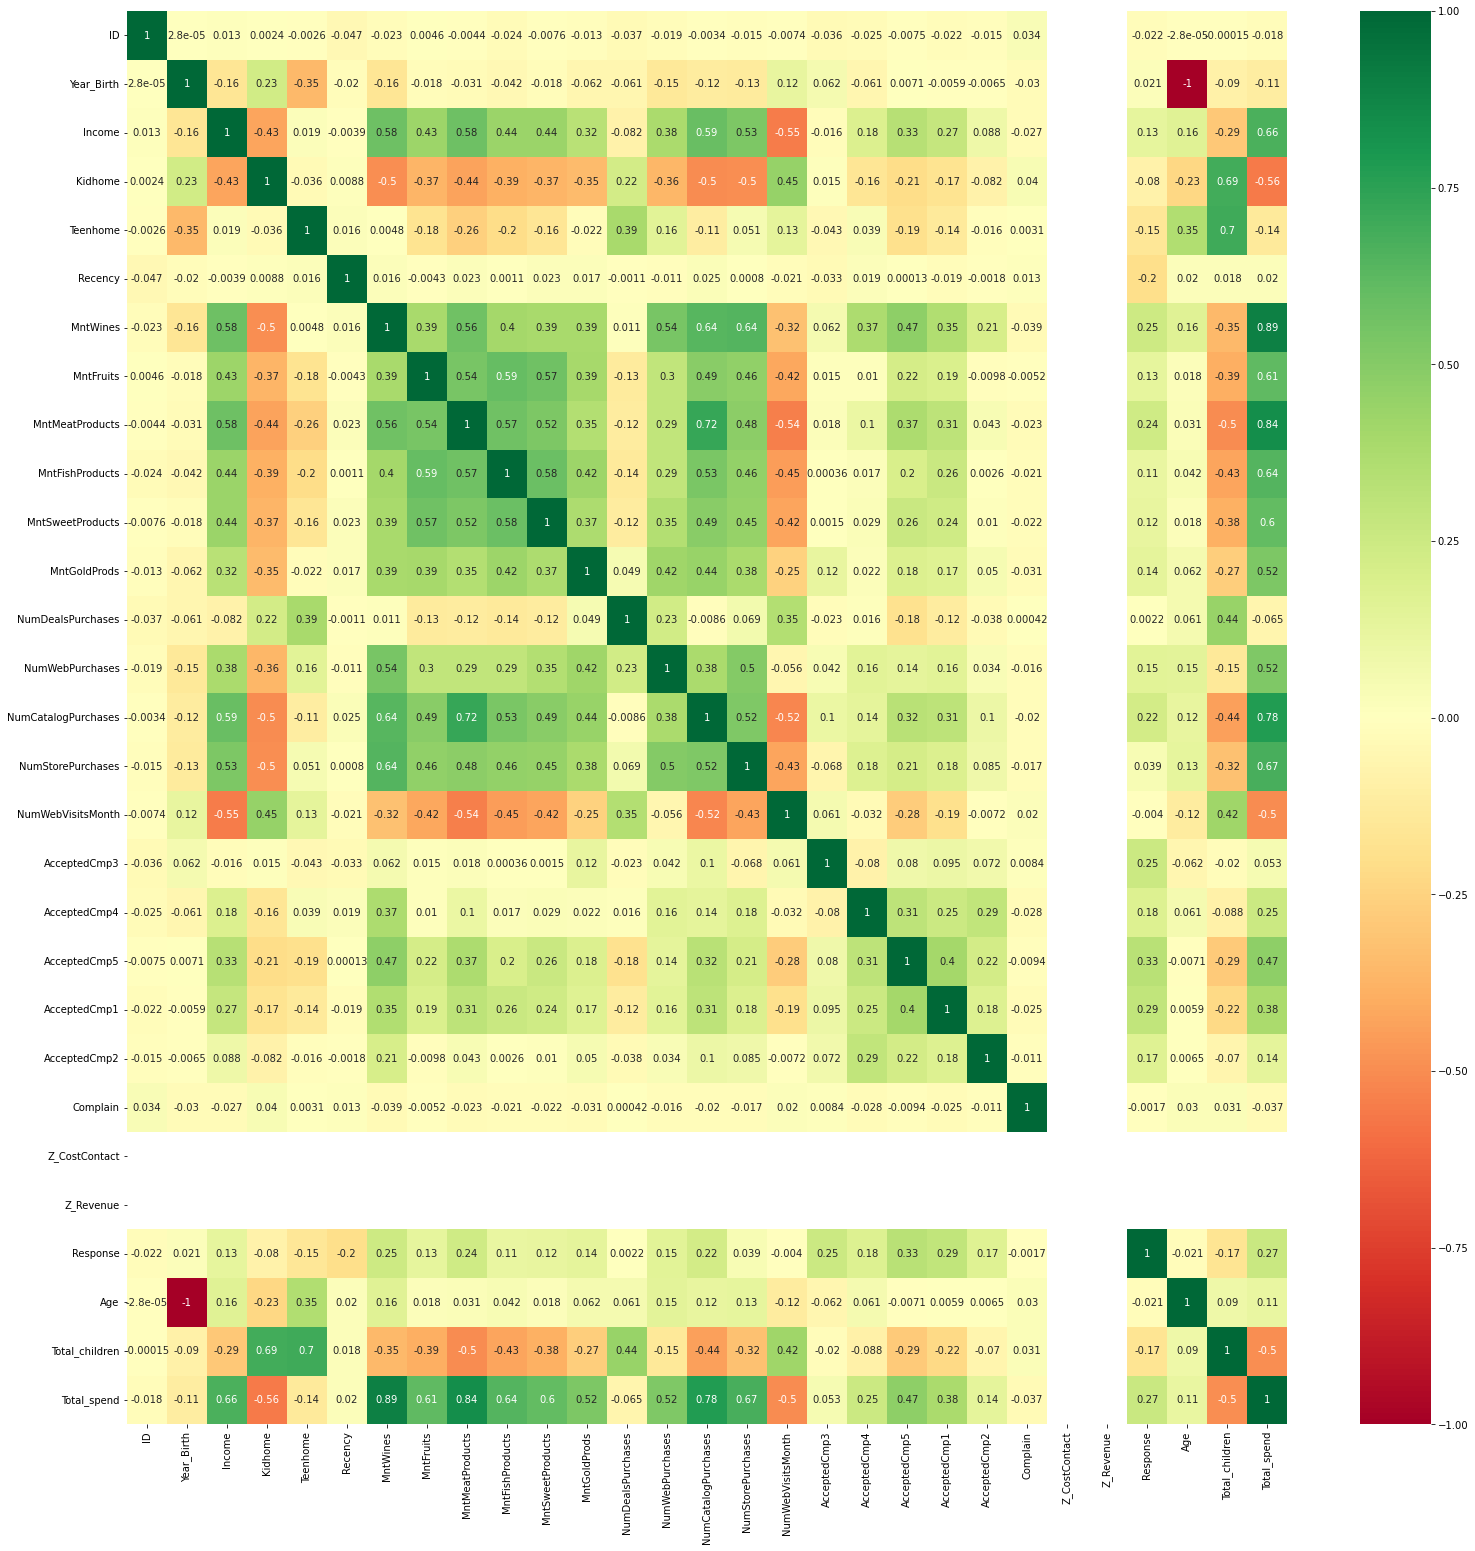

In [49]:
#HEATMAP to know the CORRELATION between the different FEATURES of the dataset
#Will help in better feature selection

#Correlations of each feature

corrmat = Customer.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))

#HEATMAP

g=sns.heatmap(Customer[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# THANK YOU!